# Breast cancer circulating tumour cell classification
## 1. Data
This section focuses on the first look at the data about circulating tumour cells (CTCs).

Importing required libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Information about the data.

Import CTCs and their gene expression data form "data/all_dataset_sort_normalized.tsv" file  and transpose it so that rows will be as the cells.

In [2]:
data_path = os.path.join(os.pardir, 'data', 'all_dataset_sort_normalized.tsv')
df = pd.read_csv(data_path,  sep='\t', on_bad_lines='warn', index_col=0).transpose()
del data_path
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000284332.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
BRx_42_1_10_20_CTC_jor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRx_42_1_9_14_CTC_jor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRx_42_1_9_22_CTC_jor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRx_42_1_9_29_CTC_jor,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRx_42_2_9_14_CTC_jor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, BRx_42_1_10_20_CTC_jor to X204_NC_mar
Columns: 63856 entries, ENSG00000223972.5 to ENSG00000277374.1
dtypes: int64(63856)
memory usage: 232.9+ MB


In [4]:
# How many null values are in the data?
print("Null values in the data: ", df.isnull().sum(axis=1).sum())

# How many columns have only '0' values?
print("Columns with zeros values only: ", (df == 0).all().sum())

# How many columns have only '1' values?
print("Columns with ones values only: ", (df == 1).all().sum())

Null values in the data:  0
Columns with zeros values only:  11084
Columns with ones values only:  0


The empty columns (with only zeros) do not affect our data, so they can be deleted to save space and make calculations easier.

In [5]:
cols_to_del = (df == 0).all().rename("Remove")
cols_to_del = cols_to_del[cols_to_del == True]
cols_to_del.info()

<class 'pandas.core.series.Series'>
Index: 11084 entries, ENSG00000284332.1 to ENSG00000277374.1
Series name: Remove
Non-Null Count  Dtype
--------------  -----
11084 non-null  bool 
dtypes: bool(1)
memory usage: 97.4+ KB


In [6]:
df.drop(columns=cols_to_del.index, inplace=True)
del cols_to_del
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, BRx_42_1_10_20_CTC_jor to X204_NC_mar
Columns: 52772 entries, ENSG00000223972.5 to ENSG00000210196.2
dtypes: int64(52772)
memory usage: 192.5+ MB


### Extract circulating tumour cells (_CTC) from the data, which contains additional white blood cells (_WBC/_CD45/_NC).

In [7]:
df.memory_usage(index=False).sum()

201800128

In [8]:
df = df[df.index.str.contains('_CTC') & ~df.index.str.contains('_WBC') & ~df.index.str.contains('_CD45') & ~df.index.str.contains('_NC')]  # dataset with Circulation Tumour Cells only
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52772 entries, ENSG00000223972.5 to ENSG00000210196.2
dtypes: int64(52772)
memory usage: 140.5+ MB


In [9]:
df.memory_usage(index=False).sum()

147339424

Counting the number of CTCs in each laboratory

In [10]:
df.index.str[-3:].value_counts()

ebr    107
poo     81
jor     74
szc     65
mar     22
Name: count, dtype: int64

### CTCs overview

In [11]:
print("Max value: ", df.max(axis=0, numeric_only=True).max())
print("Max index: ", df.idxmax(axis=0).idxmax())
print("Min value: ", df.min(axis=0, numeric_only=True).min())

Max value:  12736006
Max index:  ENSG00000183114.7
Min value:  0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52772 entries, ENSG00000223972.5 to ENSG00000210196.2
dtypes: int64(52772)
memory usage: 140.5+ MB


Statistical measures for all gene expressions

In [13]:
pd.set_option('display.precision', 2)
df.stack().describe()

count    1.84e+07
mean     5.15e+01
std      4.93e+03
min      0.00e+00
25%      0.00e+00
50%      0.00e+00
75%      0.00e+00
max      1.27e+07
dtype: float64

Statistical measures for all gene expressions, but only for values > 0

In [14]:
df.stack()[lambda x: x != 0].describe()

count    1.77e+06
mean     5.37e+02
std      1.59e+04
min      1.00e+00
25%      2.00e+00
50%      1.10e+01
75%      9.30e+01
max      1.27e+07
dtype: float64

Gene expressions have a very large range from 0 to 12736006, but 75% are less than 93. Expressions > 0 are modified by a logarithm with base 2 to reduce this range.

In [15]:
log2_lambda = lambda x: np.log2(x) if (x > 0 and x != 1) else x
df = df.map(lambda x: log2_lambda(x) if isinstance(x, (int, float)) else x)

Statistics for all gene expression after log2

In [16]:
df.stack().describe()

count    1.84e+07
mean     4.04e-01
std      1.59e+00
min      0.00e+00
25%      0.00e+00
50%      0.00e+00
75%      0.00e+00
max      2.36e+01
dtype: float64

Statistics for gene expression after log2 with values > 0

In [17]:
df.stack()[lambda x: x != 0].describe()

count    1.77e+06
mean     4.21e+00
std      3.22e+00
min      1.00e+00
25%      1.00e+00
50%      3.46e+00
75%      6.54e+00
max      2.36e+01
dtype: float64

### Add information about CTC state (phenotype): 0 (epithelial), 1 (mesenchymal) state base on EMT score.
Import EMT score data

In [18]:
emt_score_data_path = os.path.join(os.pardir, 'data', 'emt_score.tsv')
df_emt_score = pd.read_csv(emt_score_data_path,  sep='\t', on_bad_lines='warn', index_col=0)
del emt_score_data_path
df_emt_score.head()

,EMT score
Cell,
BRx_42_1_10_20_CTC_jor,-1.49
BRx_42_1_9_14_CTC_jor,0.15
BRx_42_1_9_22_CTC_jor,-1.47
BRx_42_1_9_29_CTC_jor,-1.33
BRx_42_2_9_14_CTC_jor,-0.98


In [19]:
df_emt_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EMT score  349 non-null    float64
dtypes: float64(1)
memory usage: 5.5+ KB


Statistical measures for EMT score

In [20]:
df_emt_score.describe()

,EMT score
count,349.00
mean,-0.43
std,0.69
min,-2.13
25%,-0.93
50%,-0.07
75%,0.00
max,0.36


Merge CTC data with EMT score data

In [21]:
df = df.merge(df_emt_score, left_index=True, right_index=True)
del df_emt_score
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2,EMT score
BRx_42_1_10_20_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,3.32,3.17,0.0,5.67,0.0,0.00,-1.49
BRx_42_1_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,7.00,4.91,0.0,7.29,0.0,3.91,0.15
BRx_42_1_9_22_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,9.94,7.69,0.0,11.79,0.0,3.58,-1.47
BRx_42_1_9_29_CTC_jor,0.0,1.0,0.0,0,0,0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,15.79,14.23,0.0,17.63,0.0,9.71,-1.33
BRx_42_2_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,2.0,...,0.0,0.0,0.0,12.01,10.26,0.0,13.00,0.0,4.39,-0.98


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52773 entries, ENSG00000223972.5 to EMT score
dtypes: float64(48534), int64(4239)
memory usage: 140.5+ MB


EMT score was calculated by 10 columns: `'ENSG00000115414.18','ENSG00000170558.8', 'ENSG00000106366.8', 'ENSG00000186081.11', 'ENSG00000135480.15', 'ENSG00000170421.12','ENSG00000111057.10', 'ENSG00000171345.13', 'ENSG00000119888.10', 'ENSG00000039068.18'`. Cells with 0 EMT score and all those columns equal 0 should be removed, because their EMT score is not valid.

In [23]:
indexes_to_drop = df.loc[df['EMT score'] == 0][['ENSG00000115414.18','ENSG00000170558.8', 'ENSG00000106366.8', 'ENSG00000186081.11', 'ENSG00000135480.15', 'ENSG00000170421.12','ENSG00000111057.10', 'ENSG00000171345.13', 'ENSG00000119888.10', 'ENSG00000039068.18']].any(axis=1)
indexes_to_drop = indexes_to_drop.index[indexes_to_drop==False]
print(indexes_to_drop)

Index(['BRx_111_3_10_08_15_CTC_jor', 'BRx_139_1_CTC_jor', 'Br11_17_CTC_szc',
       'Br7_4_CTC_szc', 'Br38_5_CTC_szc', 'Br30_1_CTC_szc', 'Br30_6_CTC_1_szc',
       '1850055018_CS38_S14_CTC_poo', '1850061049_CS11_S1_CTC_poo',
       '1850061049_CS17_S3_CTC_poo', '1850061049_CS23_S5_CTC_poo',
       '1850061049_CS31_S11_CTC_poo', '1850061049-CS2_S12_CTC_poo',
       '1850061049-CS6_S45_CTC_poo', '1850061049-CS8_S47_CTC_poo',
       '1851009049_CS12_S16_CTC_poo', '1851009049_CS15_S18_CTC_poo',
       '1851009049_CS17_S20_CTC_poo', '1851009049_CS7_S23_CTC_poo',
       '1851009049_CS8_S24_CTC_poo', '1851013039_CS1_S26_CTC_poo',
       '1851013039_CS39_S58_CTC_poo', '1851013039_CS6_S70_CTC_poo',
       '1851030001_BC297CS1_S17_CTC_poo', '1851030001-BC297CS3_S19_CTC_poo',
       '1851030001-BC297CS5_S21_CTC_poo', '1851030001_BC297CS8_S24_CTC_poo',
       '1851030113-BC130CS1_S9_CTC_poo', '1851030113-BC130CS2_S10_CTC_poo',
       '1851030113-BC130CS3_S11_CTC_poo', '1851030113-BC130CS5_S13_CTC_

In [24]:
df.drop(indexes_to_drop, inplace=True)
del indexes_to_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52773 entries, ENSG00000223972.5 to EMT score
dtypes: float64(48534), int64(4239)
memory usage: 123.6+ MB


Removing 'EMT score' to leave only gene expression data and the 'state' column. Removing columns on which EMT is based on.

In [25]:
df.drop(['ENSG00000115414.18','ENSG00000170558.8', 'ENSG00000106366.8', 'ENSG00000186081.11', 'ENSG00000135480.15', 'ENSG00000170421.12','ENSG00000111057.10', 'ENSG00000171345.13', 'ENSG00000119888.10', 'ENSG00000039068.18'], axis="columns", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52763 entries, ENSG00000223972.5 to EMT score
dtypes: float64(48524), int64(4239)
memory usage: 123.6+ MB


Statistic for EMT after removing the genes and the cells

In [26]:
df_desc = df['EMT score'].describe()
df_desc

count    3.07e+02
mean    -4.92e-01
std      7.12e-01
min     -2.13e+00
25%     -1.19e+00
50%     -1.11e-01
75%      8.42e-03
max      3.57e-01
Name: EMT score, dtype: float64

## Describe cells as 'EPI' or 'MES'

Sort EMT values and extract cells author (3 last letters) for visualisation

In [43]:
surnames = {'mar': 'Markiewicz', 'jor': 'Jordan', 'poo': 'Poonia', 'ebr': 'Ebright', 'szc': 'Szczerba'}
df_sorted_emt = pd.DataFrame(df['EMT score'].sort_values(ascending=True)).assign(surname=lambda x: x.index.str[-3:]).reset_index()
df_sorted_emt['surname'] = df_sorted_emt['surname'].map(lambda x : surnames[x])
df_sorted_emt

,index,EMT score,surname
0,BRx_136_2_123014_CTC_jor,-2.13,Jordan
1,BRx_136_1_123014_CTC_jor,-2.08,Jordan
2,Br7_2_CTC_szc,-1.94,Szczerba
3,Br61_CTC___35_szc,-1.90,Szczerba
4,Br57_CTC__14_szc,-1.88,Szczerba
...,...,...,...
302,BRx_172_2_07_07_15_CTC_jor,0.29,Jordan
303,Brx95_1_SC1_071713_CTC_ebr,0.30,Ebright
304,Reanalysis_Brx72_1_SC2_031813_CTC_ebr,0.31,Ebright
305,Brx120_1_SC3_120513_CTC_ebr,0.34,Ebright


Describe if cell has EMT > 0 in each set - also for visualisation

In [44]:
colors = {'Markiewicz': 'r', 'Jordan': 'm', 'Poonia': 'b', 'Ebright': 'g', 'Szczerba': 'y'}
df_sorted_emt['EMT>0'] = df_sorted_emt['EMT score'].apply(lambda x: x > 0)
lab_emt_cross = pd.crosstab(df_sorted_emt['surname'], df_sorted_emt['EMT>0']).sort_values(by='surname')
cell_text = lab_emt_cross.to_numpy()
print(cell_text)

[[62 37]
 [43 29]
 [18  1]
 [44 13]
 [59  1]]


Visualise EMT score by datasets

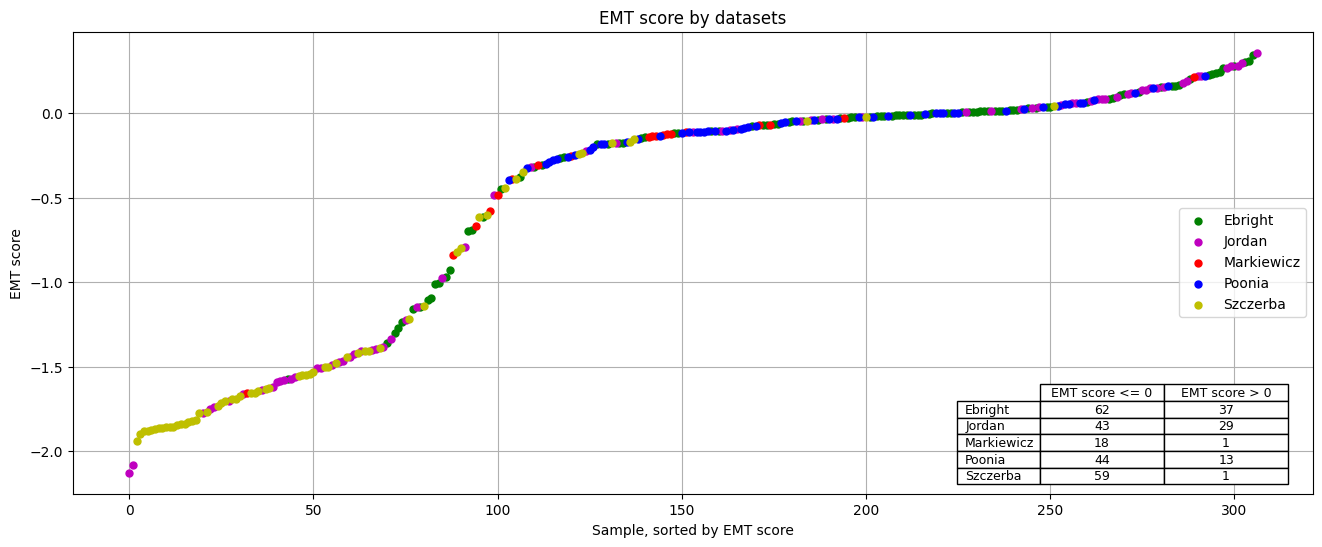

In [32]:
plt.figure(figsize=(16,6))
for category, group in df_sorted_emt.groupby('surname'):
    plt.scatter(group.index, group['EMT score'], label=category, color=colors[category], s=25).set_zorder(50)
plt.xlabel('Sample, sorted by EMT score')
plt.ylabel('EMT score')
plt.title('EMT score by datasets')
plt.legend(loc="center right")
plt.grid(True)
plt.table(cellText=cell_text, 
          colLabels=['EMT score <= 0', 'EMT score > 0'], rowLabels=[ 'Ebright', 'Jordan', 'Markiewicz',  'Poonia', 'Szczerba'], 
          loc='lower right' , 
          colWidths=[0.1] * 3, 
          cellLoc='center').set_zorder(100)
plt.show()

Different plot

Each dataset distribution

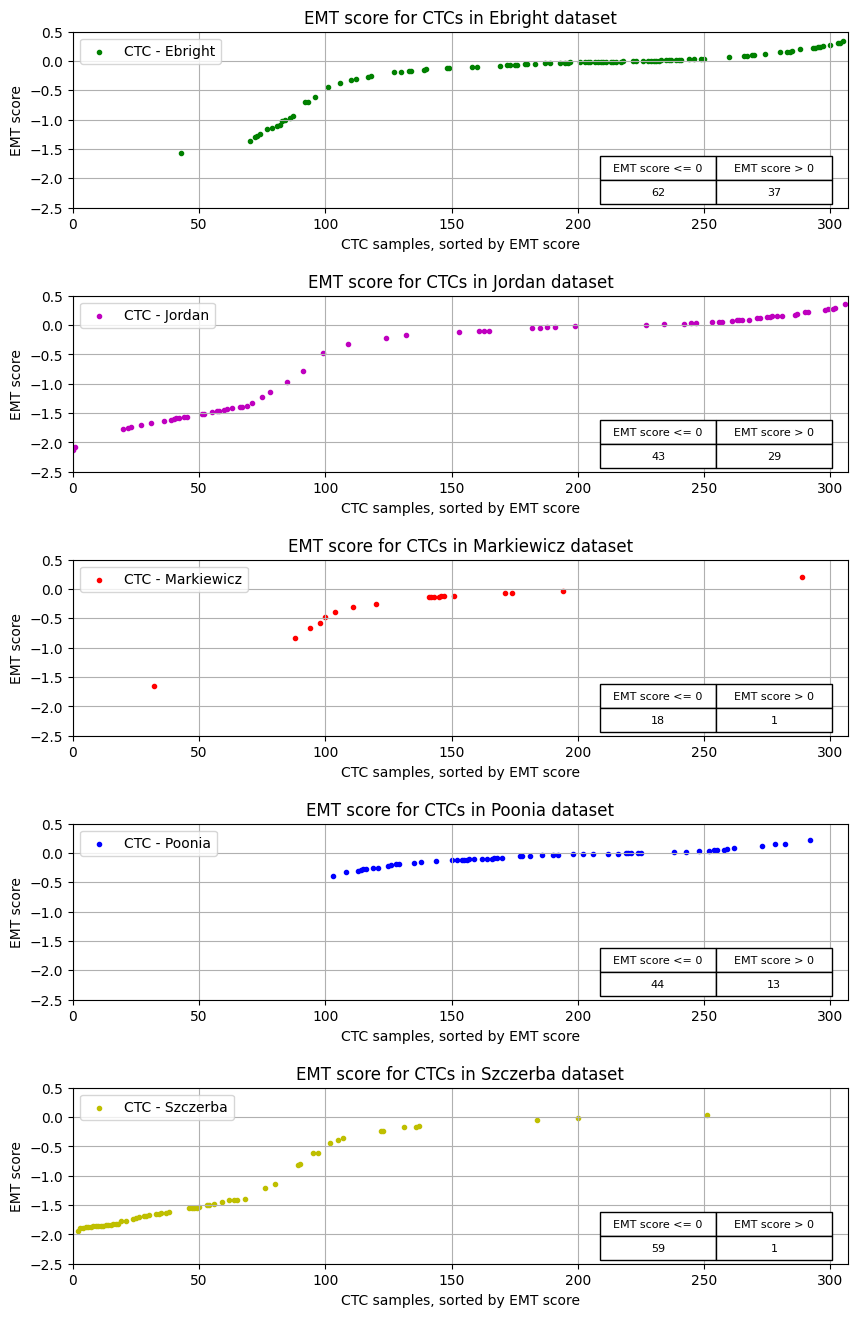

In [36]:
plt.figure(figsize=(10,16))

for idx, (category, group) in enumerate(df_sorted_emt.groupby('surname')):
    sub_plt_lab = plt.subplot(5, 1, idx+1)
    sub_plt_lab.scatter(
        x=group.index, 
        y=group["EMT score"], 
        c=colors[category], 
        marker='.', 
        label="CTC - "+category)
    sub_plt_lab.set_xlabel('CTC samples, sorted by EMT score')
    sub_plt_lab.set_ylabel('EMT score')
    sub_plt_lab.set_title(f'EMT score for CTCs in {category} dataset')
    sub_plt_lab.grid(visible=True, which='major')
    sub_plt_lab.set_yticks(np.arange(-2.5, 1, step=0.5))
    sub_plt_lab.set_xlim(0, 307)
    plt.legend(loc="upper left")
    table = plt.table(
        cellText=[[lab_emt_cross.loc[category, False], lab_emt_cross.loc[category, True]]], 
        colLabels=['EMT score <= 0', 'EMT score > 0'], 
        loc='lower right' , 
        colWidths=[0.15] * 2, 
        cellLoc='center')
    table.scale(1,1.75)
    table.set_zorder(100)

plt.subplots_adjust(hspace=0.5)
plt.show()

  Assume that cells with EMT score higher than 0 have mesenchymal state, the rest have epithelial state. The dataframe will have "state" column where 0 means epithelial and 1 means mesenchymal state.

In [45]:
df['state'] = df['EMT score'].apply(lambda x: 0 if x <= 0 else 1)
df[['EMT score','state']].head()

,EMT score,state
BRx_42_1_10_20_CTC_jor,-1.49,0
BRx_42_1_9_14_CTC_jor,0.15,1
BRx_42_1_9_22_CTC_jor,-1.47,0
BRx_42_1_9_29_CTC_jor,-1.33,0
BRx_42_2_9_14_CTC_jor,-0.98,0


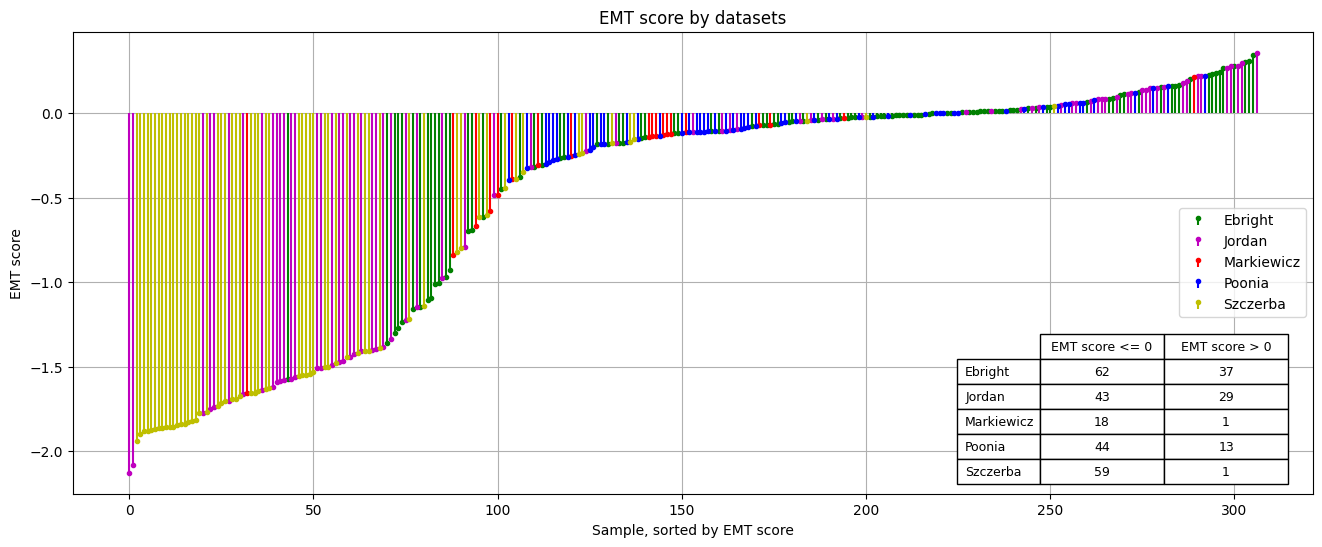

In [33]:
plt.figure(figsize=(16, 6))
for category, group in df_sorted_emt.groupby('surname'):
    plt.stem(group.index, group['EMT score'], label=category, linefmt=colors[category] + '-', markerfmt='.', basefmt=' ')

plt.xlabel('Sample, sorted by EMT score') 
plt.ylabel('EMT score')
plt.title('EMT score by datasets')
plt.legend(loc="center right")
plt.grid(visible=True, which='major')
table=plt.table(cellText=cell_text, 
          colLabels=['EMT score <= 0', 'EMT score > 0'], rowLabels=[ 'Ebright', 'Jordan', 'Markiewicz',  'Poonia', 'Szczerba'], 
          loc='lower right' , 
          colWidths=[0.1] * 3, 
          cellLoc='center')
table.scale(1,1.5)
table.set_zorder(100)

plt.show()

How many EPI and MES are in the CTCs?

In [46]:
df['state'].value_counts().rename(f"Value counter")

state
0    226
1     81
Name: Value counter, dtype: int64

Number of EPI and MES in each author set

In [47]:
df_sorted_emt['state'] = df_sorted_emt['EMT score'].apply(lambda x: 0 if x <= 0 else 1)
lab_state_number = pd.crosstab(df_sorted_emt['surname'], df_sorted_emt['state']).sort_values(by='surname')
lab_state_number

state,0,1
surname,,
Ebright,62,37
Jordan,43,29
Markiewicz,18,1
Poonia,44,13
Szczerba,59,1


Remove EMT score and check information for data without 'state'

In [48]:
df.drop(['EMT score'], axis=1, inplace=True)
df.drop(['state'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52762 entries, ENSG00000223972.5 to ENSG00000210196.2
dtypes: float64(48523), int64(4239)
memory usage: 123.6+ MB


Save CTC data into 'ctc_dataset.tsv'

In [49]:
df.to_csv(os.path.join(os.pardir, 'data', 'ctc_dataset.tsv'), sep='\t', index=True)

## Training, validation and testing sets
Each model will be trained, validated and tested on three independent datasets.

### Splitting the datasets.
Choosing randomly 12% of rows for test dataset

In [50]:
df_test = df.sample(frac=0.12, replace=False, random_state=25)

Choosing randomly 15% of the rest rows for test dataset

In [51]:
df_valid = df[~df.index.isin(df_test.index)].sample(frac=0.15,  replace=False, random_state=25)

Rows included in the training and the validation set will be in testing set

In [52]:
df_train = df[~df.index.isin(df_valid.index.union(df_test.index))]

### Datasets statistics
Datasets gene expression statistics

In [53]:
df_split_desc = pd.DataFrame({'Training': df_train.stack().describe(), 'Testing': df_test.stack().describe(), 'Validation': df_valid.stack().describe()})
df_split_desc

,Training,Testing,Validation
count,1.21e+07,1.95e+06,2.11e+06
mean,4.30e-01,4.67e-01,4.72e-01
std,1.64e+00,1.71e+00,1.76e+00
min,0.00e+00,0.00e+00,0.00e+00
25%,0.00e+00,0.00e+00,0.00e+00
50%,0.00e+00,0.00e+00,0.00e+00
75%,0.00e+00,0.00e+00,0.00e+00
max,2.36e+01,2.11e+01,2.27e+01


Datasets gene expression statistics without "0" values

In [54]:
df_split_desc_out_0 =pd.DataFrame({'Training': df_train[df_train != 0].stack().describe(), 'Testing': df_test[df_test != 0].stack().describe(), 'Validation': df_valid[df_valid != 0].stack().describe()})
df_split_desc_out_0

,Training,Testing,Validation
count,1.25e+06,200484.00,216284.00
mean,4.18e+00,4.55,4.61
std,3.21e+00,3.12,3.34
min,1.00e+00,1.00,1.00
25%,1.00e+00,1.00,1.00
50%,3.46e+00,4.39,4.17
75%,6.48e+00,6.81,7.15
max,2.36e+01,21.07,22.74


Concatenated gene expression statistics

In [55]:
df_split_desc.columns = pd.MultiIndex.from_product([['All gene expressions'], df_split_desc.columns])
df_split_desc_out_0.columns = pd.MultiIndex.from_product([['Gene expressions > 0'], df_split_desc_out_0.columns])

df_split_gens_desc_concat = pd.concat([df_split_desc, df_split_desc_out_0], axis=1)
df_split_gens_desc_concat

All gene expressions                      Gene expressions > 0  \
                  Training   Testing Validation             Training   
count             1.21e+07  1.95e+06   2.11e+06             1.25e+06   
mean              4.30e-01  4.67e-01   4.72e-01             4.18e+00   
std               1.64e+00  1.71e+00   1.76e+00             3.21e+00   
min               0.00e+00  0.00e+00   0.00e+00             1.00e+00   
25%               0.00e+00  0.00e+00   0.00e+00             1.00e+00   
50%               0.00e+00  0.00e+00   0.00e+00             3.46e+00   
75%               0.00e+00  0.00e+00   0.00e+00             6.48e+00   
max               2.36e+01  2.11e+01   2.27e+01             2.36e+01   

                             
         Testing Validation  
count  200484.00  216284.00  
mean        4.55       4.61  
std         3.12       3.34  
min         1.00       1.00  
25%         1.00       1.00  
50%         4.39       4.17  
75%         6.81       7.15  
max        21.07      22.74

## Separating labels from features

In [56]:
X_test = df_test.drop(['state'], axis=1)
y_test = df_test['state']
X_valid = df_valid.drop(['state'], axis=1)
y_valid = df_valid['state']
X_train = df_train.drop(['state'], axis=1)
y_train = df_train['state']

How many epithelial and mesenchymal cells are in each dataset?

In [57]:
pd.DataFrame({"Training": y_train.value_counts(),"Testing": y_test.value_counts(), "Validation": y_valid.value_counts()})

,Training,Testing,Validation
state,,,
0,166,29,31
1,64,8,9


How many cells from each publication are in datasets?

In [60]:
def how_many_cells_lab(series:pd.Series) -> pd.DataFrame:
    prefix = {'Markiewicz': 'mar',  'Jordan': 'jor', 'Poonia': 'poo', 'Ebright': 'ebr', 'Szczerba' : 'szc'}
    res_series = pd.Series(index=['Ebright', 'Jordan', 'Markiewicz',  'Poonia', 'Szczerba'])
    for surname in res_series.index:
        res_series[surname] = series.index.str.contains(prefix[surname]).sum()
    return res_series

pd.DataFrame({"Training": how_many_cells_lab(y_train), 
              "Validation": how_many_cells_lab(y_valid),
              "Testing": how_many_cells_lab(y_test)})

,Training,Validation,Testing
Ebright,73.0,13.0,13.0
Jordan,54.0,11.0,7.0
Markiewicz,13.0,4.0,2.0
Poonia,45.0,7.0,5.0
Szczerba,45.0,5.0,10.0


## Saving the datasets
Each method will be using the same data object. For this reason, the datasets will not be written to text files, but to the HDF5 store object.

Creating a store object

In [ ]:
hdf_store = pd.HDFStore(os.path.join(os.pardir, 'data', 'ctc_split_datasets.h5'))

Save datasets to the store

In [47]:
hdf_store["X_train"] = X_train
hdf_store["X_valid"] = X_valid
hdf_store["X_test"] = X_test
hdf_store["y_train"] = y_train
hdf_store["y_valid"] = y_valid
hdf_store["y_test"] = y_test

Close the store object

In [ ]:
hdf_store.close()